In [1]:
#IMPORT DAS BIBLIOTECAS NECESSÁRIAS
import numpy as np #PARA DEFINIR OS PONTOS DE OBSERVAÇÕES 
from GeneticAlgorithm import GeneticAlgorithm as GA #IMPORTAR A CLASSE ALGORITMO GENETICO
import matplotlib.pyplot as plt #PARA VISUALIZAR O RESULTADO
from Models import rect #IMPORTANDO O MODELO
from Data.Functionals import phi #IMPORTANDO A FUNCAO DE AJUSTE
from Data.Population import Fontes #PRA CRIAR A POPULACAO USANDO O MELHOR DEPOIS DO GENETICO

In [2]:
#DEFINICAO DOS PARAMETROS PRO GENETICO
xobs = np.linspace(-1000,1000,500) #SO PRA CALCULAR O GZ DO MELHOR INDIVIDUO DEPOIS DO GENETICO
zobs = np.zeros( len( xobs ) ) #SO PRA CALCULAR O GZ DO MELHOR INDIVIDUO DEPOIS DO GENETICO

# dimensoes do dique vertical:
xmin = -100.
xmax = +100.
zmin = 200.0
zmax = 800.0
rho = 2.95
model = rect( xmin, xmax, zmin, zmax, rho) #CRIANDO O MODELO
massa_verdadeira = rho * (xmax-xmin)*(zmax-zmin)*1200*1000
print(massa_verdadeira)

model_gz = model.Gz( xobs, zobs ) #CALCULANDO O GZ DO MODELO
model_gz_noised = model.addnoise( ) #CALCULANDO O GZ DO MODELO + GAUSSIAN NOISE
min_bounds = [ -900, 100, 1e8 ] #ONDE PROCURAR AS SOLUCOES
max_bounds = [ +900, 1000, 1e12 ] #ONDE PROCURAR AS SOLUCOES
nfontes = 30 #NUMERO DE BOLINHAS DE CADA INDIVIDUO
nind = 50 #NUMERO DE INDIVIDUOS
pmut = 0.1 #PROBABILIDADE DE CADA INDIVIDUO MUTAR
mu = 0#0.09 #FATOR DE REGULARIZACAO
ngera = 100 #NUMERO DE GERACOES

424800000000.0


In [4]:
#ALGORITMO GENETICO
ga = GA( phi, [ model_gz_noised, 'L2', mu ], min_bounds, max_bounds, pmut, nfontes, nind) #CRIANDO O AG USANDO OS PARAMETROS ESCOLHIDOS
ga.Initialize()
ga.FirstFit()
pop = Fontes( ) #CRIANDO UMA NOVA POPULACAO PRA GUARDAR O MELHOR DO GENETICO
melhor_primeira = pop.Gera_from_Existing( [ ga.winner ] ) #GUARDANDO O MELHOR DO GENETICO NESSA NOVA POPULACAO(QUE É UMA CLASSE) ( O MELHOR DO GENETICO TEM O NOME DE ga.winner)
gz_best_primeira = 0 #INICIALIZANDO O GZ DO MELHOR
for b in melhor_primeira: #O MELHOR É UM DICIONARIO, ONDE CADA CHAVE( OBJETO SPHERE ) GUARDA AS PROPIEDADES DESSA SPHERE( X, Y, M)
    for i in b: #AQUI PEGAMOS APENAS AS CHAVES( SPHERES )
        gz_best_primeira += i.Gz(xobs, zobs) #CALCULAMOS O GZ DE TODAS AS SPHERES

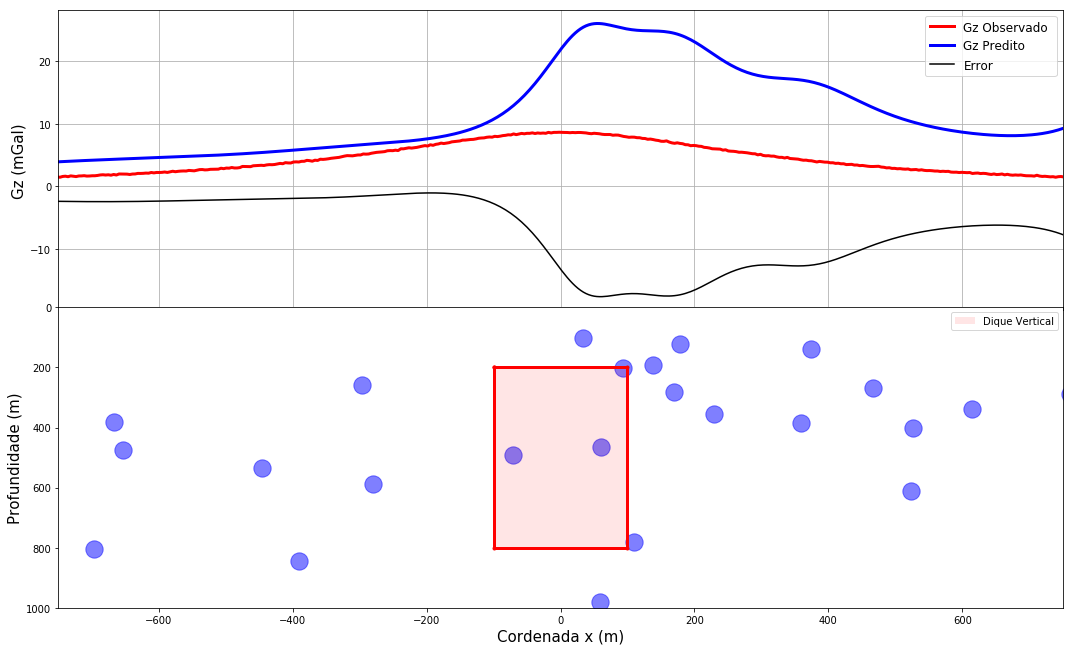

In [5]:
#PLOTANDO A O MODELO, AS BOLINHAS E AS CURVAS DA ETAPA 0
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 11), facecolor='w', sharex=True, gridspec_kw={'hspace': -0.01})

error = (model_gz-gz_best_primeira)

ax1.plot(xobs, model_gz_noised, 'r-', label='Gz Observado ', linewidth=3)
ax1.plot(xobs, gz_best_primeira, 'b-', label='Gz Predito ', linewidth=3)
ax1.plot(xobs, error, 'k-', label='Error')
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.set_xlim(-750, 750)
ax1.grid()
ax1.label_outer()
ax2.scatter(ga.winner[:, 0], ga.winner[:, 1], c='blue', s=300.0, alpha=0.5)
ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
        [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], ".-r", linewidth=3)

ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                 [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]],
                 facecolor='red', alpha=0.1, label='Dique Vertical')
ax2.legend()

#ax2.scatter(xobs[0:-1:5], zobs[0:-1:5] + 10, s=20, c='green')
ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(0, 1000)
ax2.set_xlabel('Cordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )

In [ ]:

ga.start( ngera ) #COMECANDO AS ITERACOES (NESTE CASO, ngera)

pop = Fontes( ) #CRIANDO UMA NOVA POPULACAO PRA GUARDAR O MELHOR DO GENETICO
best = pop.Gera_from_Existing( [ ga.winner ] ) #GUARDANDO O MELHOR DO GENETICO NESSA NOVA POPULACAO(QUE É UMA CLASSE) ( O MELHOR DO GENETICO TEM O NOME DE ga.winner)
gz_best = 0 #INICIALIZANDO O GZ DO MELHOR
for b in best: #O MELHOR É UM DICIONARIO, ONDE CADA CHAVE( OBJETO SPHERE ) GUARDA AS PROPIEDADES DESSA SPHERE( X, Y, M)
    for i in b: #AQUI PEGAMOS APENAS AS CHAVES( SPHERES )
        gz_best += i.Gz(xobs, zobs) #CALCULAMOS O GZ DE TODAS AS SPHERES

thetas = ga.bests_theta #GUARDANDO A LISTA DOS THETAS (REGULARIZACAO = THETA)

In [ ]:
#PLOTANDO A O MODELO, AS BOLINHAS E AS CURVAS
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 11), facecolor='w', sharex=True, gridspec_kw={'hspace': -0.01})

error = (model_gz-gz_best)

ax1.plot(xobs, model_gz_noised, 'r-', label='Gz Observado ', linewidth=3)
ax1.plot(xobs, gz_best, 'b-', label='Gz Predito ', linewidth=3)
ax1.plot(xobs, error, 'k-', label='Error')
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.set_xlim(-750, 750)
ax1.grid()
ax1.label_outer()
ax2.scatter(ga.winner[:, 0], ga.winner[:, 1], c='blue', s=300.0, alpha=0.5)
ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
        [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], ".-r", linewidth=3)

ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                 [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]],
                 facecolor='red', alpha=0.1, label='Dique Vertical')
ax2.legend()

#ax2.scatter(xobs[0:-1:5], zobs[0:-1:5] + 10, s=20, c='green')
ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(0, 1000)
ax2.set_xlabel('Cordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )

In [ ]:
#PLOTANDO A FUNCAO THETA
plt.figure( figsize = ( 10,10 ) )
plt.plot( range( ngera ), thetas, '*-g')
plt.xlabel('Gerações', fontsize=15)
plt.grid()
plt.ylabel(r'\theta(p)', fontsize=15)
plt.show()


In [ ]:
ga.winner

In [ ]:
print(melhor_primeira)

In [ ]:
1.04097141e+10 * 30

In [ ]:
(massa_verdadeira - 312291423000.0)/massa_verdadeira